# Summarizing metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [4]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [16]:
ss,u = plainIm(os.path.join(cfg.path.fig, 'stillsSummary.csv'), ic=0)
ss = ss[ss.date>210500]
ss.date = ss.date.replace(210728, 210727)
# ss['ink_surfactant']=ss['ink_surfactant'].fillna('')
# ss['ink_type'] = [row['ink_base']+row['ink_surfactant'] for i,row in ss.iterrows()]

In [162]:
ss.date.unique()

array([210727., 210728., 210517., 210519., 210824., 210518., 210630.,
       210713.])

In [163]:
ss.ink_type.unique()

array(['water', 'mineral oil', 'mineral oil_Span 20', 'PDMS_3_mineral_25',
       'PDMS_3_silicone_25', 'PEGDA_40'], dtype=object)

In [99]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'pressureCh0',
       'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant',
       'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0',
       'ink_eta0', 'ink_v', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv',
       'ink_OhInv', 'ink_rPR', 'sup_shortname', 'sup_days', 'sup_rheModifier',
       'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base',
       'sup_type', 'sup_tau0', 'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv',
       'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift',
       'xs_yshift', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness',
       'xs_aspect_SE', 'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE',
       'xs_wN_SE', 'xs_hN_SE', 'xs_roughness_SE', 'horiz_segments',
       'horiz_maxlenN', 'horiz_totlenN', 'horiz_vN', 'horiz_roughness',
       'horiz_meanTN', 'horiz_st

# verticals

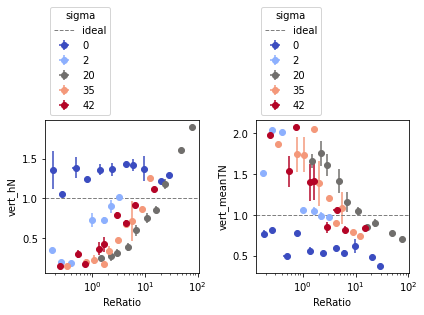

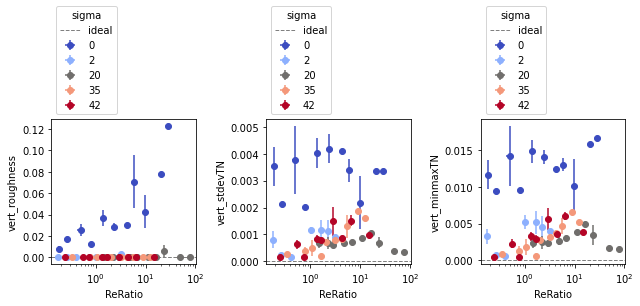

In [7]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.vert_roughness_SE<0.05]
ss1 = ss1[ss1.vert_roughness<0.5]
for j,l in enumerate([['vert_hN', 'vert_meanTN'], ['vert_roughness', 'vert_stdevTN', 'vert_minmaxTN']]):
    fig,axs = plt.subplots(1,len(l),figsize=(3*len(l),6))
    for i,s in enumerate(l):
    #     kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
    #               'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
    #               'yideal':0, 'ax':axs[i], 'fig':fig}
        mp.scatterSS(ss1, 'ReRatio', s, 'sigma', logx=True, yideal=[1,0][j], ax=axs[i], fig=fig)
    fig.tight_layout()

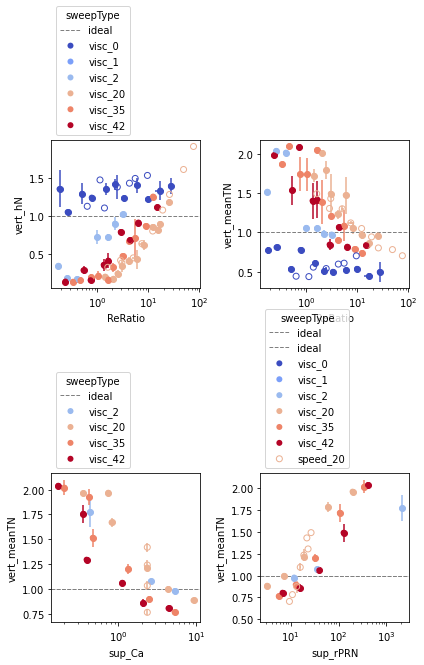

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [48]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sup_rPRN'] = 2*ss0['sup_rPR']/ss1['dEst']
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sigma']=1
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'ReRatio']=0
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sup_rPRN']=0
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
# ss0 = ss0[ss0.ink_type!="PEGDA_40"]
(ss0[ss0.sigma==0]).sup_Ca = [100000 for i in range(len(ss0[ss0.sigma==0]))]
ssspeed0 = ss0[ss0.sweepType=='speed_0']
ssspeed20 = ss0[ss0.sweepType=='speed_20']
cmap = cm.get_cmap('coolwarm') 
ssvisc = ss0[ss0.sweepType.str.contains('visc')]
fig,axs = plt.subplots(2,2,figsize=(6,9))
color20 = mp.adjust_lightness(cmap(3/5),0.9)
mp.scatterSS(ssvisc, 'ReRatio', 'vert_hN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][0], units=u, legend=True, marker='o')
mp.scatterSS(ssspeed0, 'ReRatio', 'vert_hN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[0][0], units=u, legend=False, marker=1, color=cmap(0))
mp.scatterSS(ssspeed20, 'ReRatio', 'vert_hN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[0][0], units=u, legend=False, marker=1, color=color20)
mp.scatterSS(ssvisc, 'ReRatio', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][1], units=u, legend=False, marker='o')
mp.scatterSS(ssspeed0, 'ReRatio', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[0][1], units=u, legend=False, marker=1, color=cmap(0))
mp.scatterSS(ssspeed20, 'ReRatio', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[0][1], units=u, legend=False, marker=1, color=color20)
mp.scatterSS(ssvisc, 'sup_Ca', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][0], units=u, legend=True, marker='o')
mp.scatterSS(ssspeed20, 'sup_Ca', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][0], units=u, legend=False, marker=1, color=color20)
mp.scatterSS(ssvisc,'sup_rPRN', 'vert_meanTN',  'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][1], units=u, legend=True, marker='o')
mp.scatterSS(ssspeed20,'sup_rPRN', 'vert_meanTN',  'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][1], units=u, legend=True, marker=1, color=color20)
fig.tight_layout()
fig.savefig(os.path.join("C:/Users/lmf1/OneDrive - NIST/NIST/data/shopbot/results", 'figures', 'vert_metrics.svg'), bbox_inches='tight', dpi=300)

In [11]:
ss1.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'pressureCh0',
       'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant',
       'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0',
       'ink_eta0', 'ink_v', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv',
       'ink_OhInv', 'ink_rPR', 'sup_shortname', 'sup_days', 'sup_rheModifier',
       'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base',
       'sup_type', 'sup_tau0', 'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv',
       'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift',
       'xs_yshift', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness',
       'xs_aspect_SE', 'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE',
       'xs_wN_SE', 'xs_hN_SE', 'xs_roughness_SE', 'horiz_segments',
       'horiz_maxlenN', 'horiz_totlenN', 'horiz_vN', 'horiz_roughness',
       'horiz_meanTN', 'horiz_st

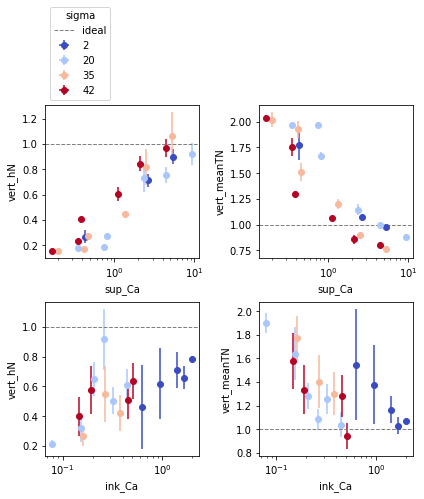

In [101]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

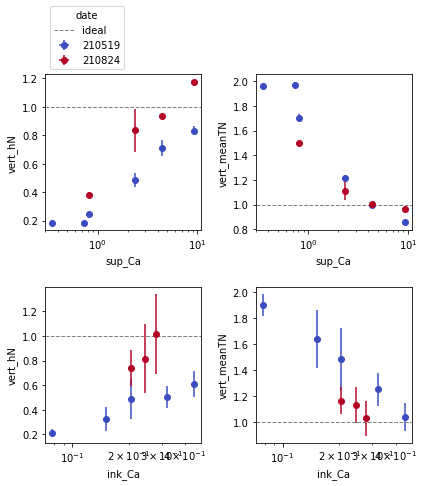

In [102]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma==20]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.1)
fig.tight_layout()

In [6]:
ss1[ss1.vert_hN>2.5]

,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,ReRatio,...,horiz_stdevTN,horiz_minmaxTN,horiz_maxlenN_SE,horiz_totlenN_SE,horiz_vN_SE,horiz_roughness_SE,horiz_meanTN_SE,horiz_stdevTN_SE,horiz_minmaxTN_SE,vHorizEst
335,I_2.75_S_2.75_VI_7.5_VS_2.5_210824,210824,0,0.603,0.907,True,True,0.089978,3.0,22.166338,...,0.001262,0.007402,0.019897,0.019897,0.127038,0.051564,0.086337,0.000165,0.000623,0.502739
331,I_2.75_S_2.75_VI_5_VS_2.5_210824,210824,0,0.603,0.907,True,True,0.130157,2.0,10.215834,...,0.001952,0.010647,0.142758,0.051020,0.034148,0.054773,0.055472,0.000253,0.001337,0.293725
323,I_2.75_S_2.75_VI_10_VS_2.5_210824,210824,0,0.603,0.907,True,True,0.069246,4.0,38.403709,...,0.001214,0.006754,0.033058,0.033058,0.193531,0.050814,0.109500,0.000093,0.000939,0.709282


Text(0.5, 0.98, 'LapRD LapRD')

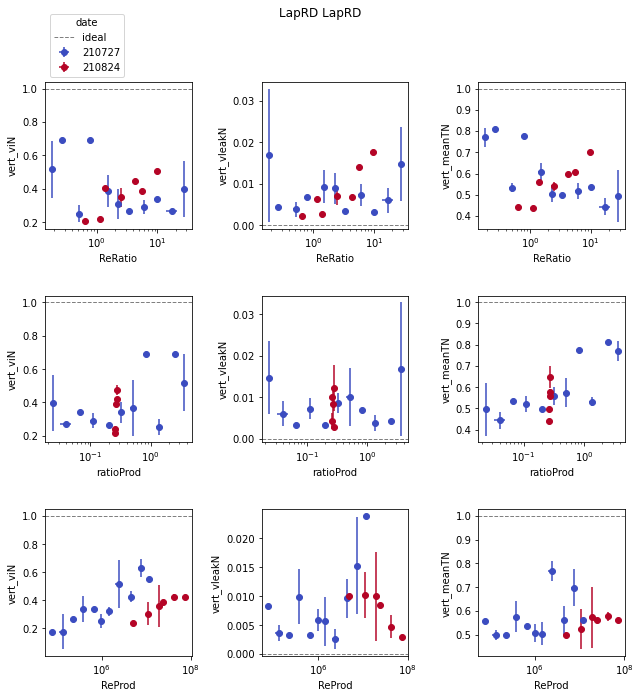

In [109]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
ss1['ratioProd'] = ss1['vRatio']*ss1['viscRatio']
ss1['ReProd'] = ss1['ink_Re']*ss1['sup_Re']
fig,axs = plt.subplots(3,3,figsize=(9,10))
for i,s2 in enumerate(['ReRatio', 'ratioProd', 'ReProd']):
    for j,s in enumerate(['vert_viN', 'vert_vleakN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=(True), yideal=([1,0,1][j]), ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.1)
fig.tight_layout()
fig.suptitle('LapRD LapRD')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x212061e6dc8>)

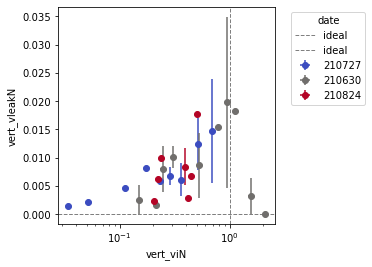

In [113]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.ink_days==1]
ss1.sort_values(by='date')
mp.scatterSS(ss1, 'vert_viN', 'vert_vleakN', 'date', logx=(True), yideal=(0), xideal=1, dx=0.1)

Text(0.5, 0.98, 'LapRD LapRD')

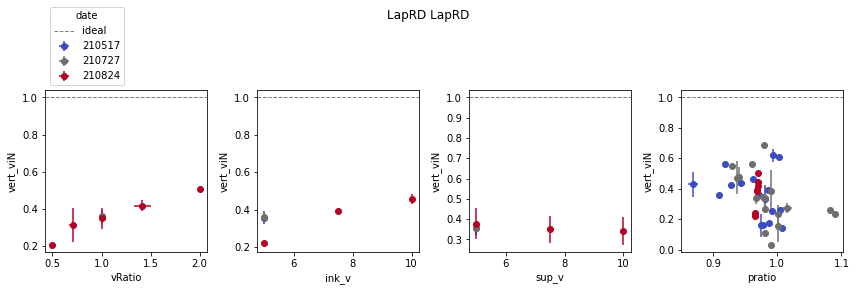

In [104]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
# ss1 = ss1[ss1.date==210824]
ss1 = ss1.sort_values(by='date')
ss1['ratioProd'] = ss1['vRatio']*ss1['viscRatio']
ss1['ReProd'] = ss1['ink_Re']*ss1['sup_Re']
ss1['pratio'] = (ss1['pressureCh0'] -1000 + ss1['vDragP'] - 9.8*12.5)/(ss1['pressureCh0'])
fig,axs = plt.subplots(1,4,figsize=(12, 4))
for j,s2 in enumerate(['vRatio', 'ink_v', 'sup_v', 'pratio']):
    for i,s in enumerate(['vert_viN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=False, yideal=1, ax=axs[j], fig=fig, legend=(i==0 and j==0), dx=0, dy=1)
fig.tight_layout()
fig.suptitle('LapRD LapRD')

Text(0.5, 0.98, 'LapRD LapRD')

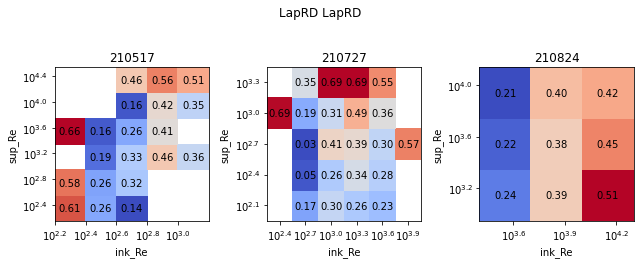

In [105]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
ss1['ratioProd'] = ss1['vRatio']*ss1['viscRatio']
ss1['ReProd'] = ss1['ink_Re']*ss1['sup_Re']
ss1['pratio'] = (ss1['pressureCh0'] + ss1['vDragP'] - 9.8*12.5)/(ss1['pressureCh0'])

dates = ss1.date.unique()
fig,axs = plt.subplots(1,len(dates),figsize=(3*(len(dates)), 4))
for j,d in enumerate(dates):
    ss2 = ss1[ss1.date==d]
    mp.colorMeshSS(ss2, 'ink_Re', 'sup_Re', 'vert_viN', logx=True, logy=True, ax=axs[j], fig=fig, legend=False, dx=0.05, dy=0.05)
    axs[j].set_title(d)
fig.tight_layout()
fig.suptitle('LapRD LapRD')

Text(0.5, 0.98, 'sigma>0')

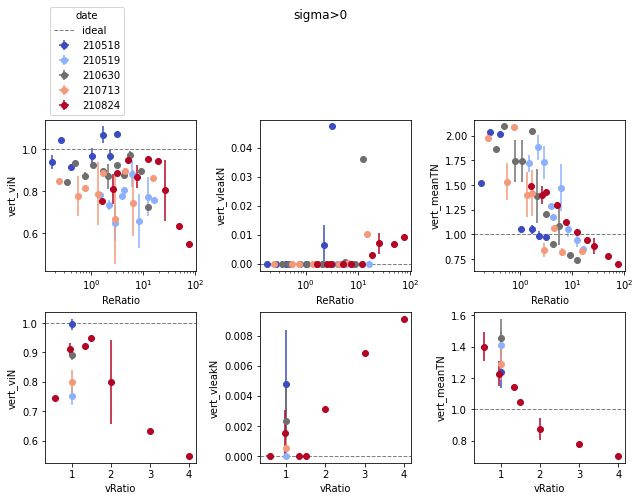

In [108]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
fig,axs = plt.subplots(2,3,figsize=(9,7))
for i,s2 in enumerate(['ReRatio', 'vRatio']):
    for j,s in enumerate(['vert_viN', 'vert_vleakN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=(i==0), yideal=([1,0,1][j]), ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.1)
fig.tight_layout()
fig.suptitle('sigma>0')

Text(0.5, 0.98, 'sigma>0')

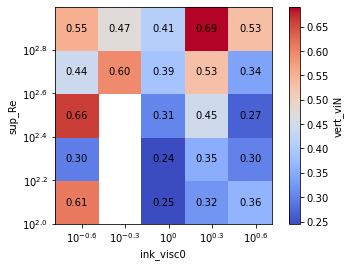

In [19]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
mp.colorMeshSS(ss1, 'ink_visc0', 'sup_Re', 'vert_viN', logx=True, logy=True, dx=0.15, dy=0.15)
fig.tight_layout()
fig.suptitle('sigma>0')

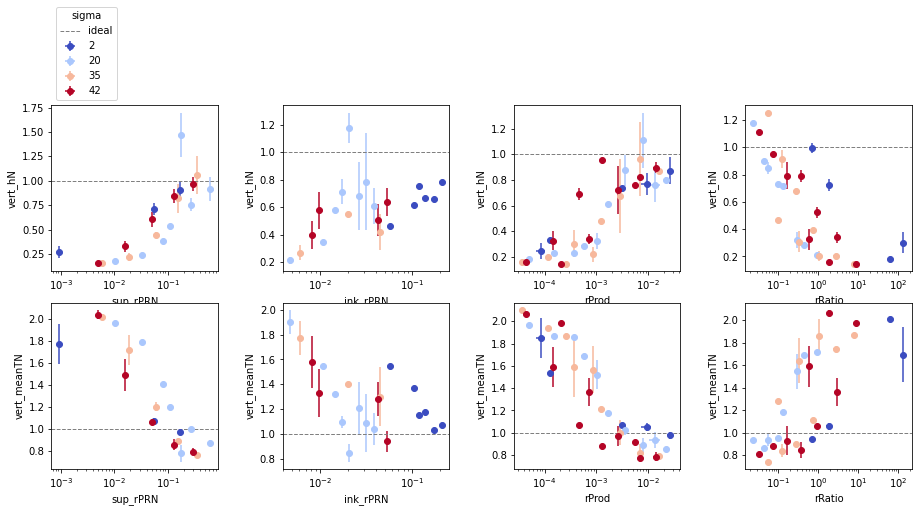

In [754]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['ink_rPRN'] = ss1['dEst']/ss1['ink_rPR']
ss1['sup_rPRN'] = ss1['dEst']/ss1['sup_rPR']
ss1['rProd'] = ss1['ink_rPRN']*ss1['sup_rPRN']
ss1['rRatio'] = ss1['ink_rPRN']/ss1['sup_rPRN']
fig,axs = plt.subplots(2,4,figsize=(13,7))
for j,s2 in enumerate(['vert_hN', 'vert_meanTN']):
    for i,s in enumerate(['sup_rPRN', 'ink_rPRN', 'rProd', 'rRatio']):
        mp.scatterSS(ss1, s, s2, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4f9534c88>)

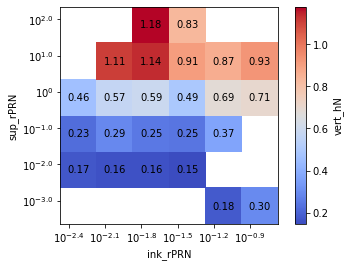

In [760]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['ink_rPRN'] = ss1['dEst']/ss1['ink_rPR']
ss1['sup_rPRN'] = ss1['dEst']/ss1['sup_rPR']
ss1['rProd'] = ss1['ink_rPRN']*ss1['sup_rPRN']
ss1['rRatio'] = ss1['ink_rPRN']/ss1['sup_rPRN']
mp.colorMeshSS(ss1, 'ink_rPRN', 'sup_rPRN', 'vert_hN', logx=True, logy=True, dx=0.18, dy=0.1)

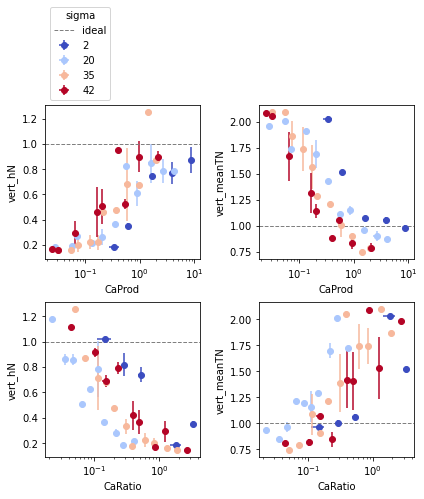

In [23]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['CaProd']=1/(ss1['sup_CaInv']*ss1['ink_CaInv'])
ss1['CaRatio']=ss1['sup_CaInv']/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['CaProd', 'CaRatio']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

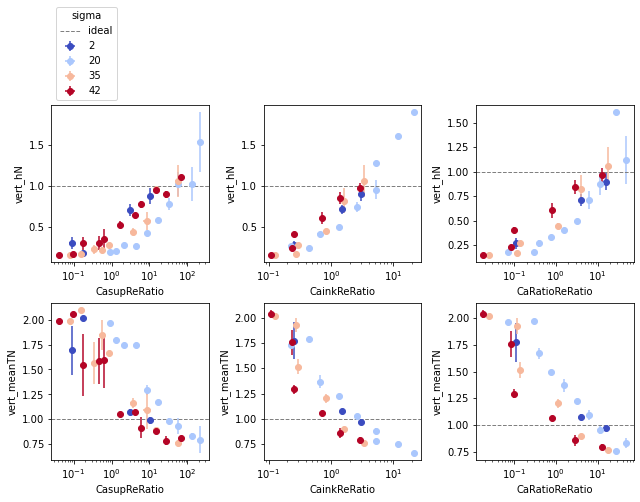

In [24]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['CasupReRatio']=ss1['ReRatio']/ss1['sup_CaInv']
ss1['CainkReRatio']=ss1['ReRatio']/ss1['ink_CaInv']
ss1['CaRatioReRatio']=ss1['ReRatio']/(ss1['sup_CaInv']*ss1['ink_CaInv'])
fig,axs = plt.subplots(2,3,figsize=(9,7))
for i,s2 in enumerate(['CasupReRatio', 'CainkReRatio', 'CaRatioReRatio']):
    for j,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

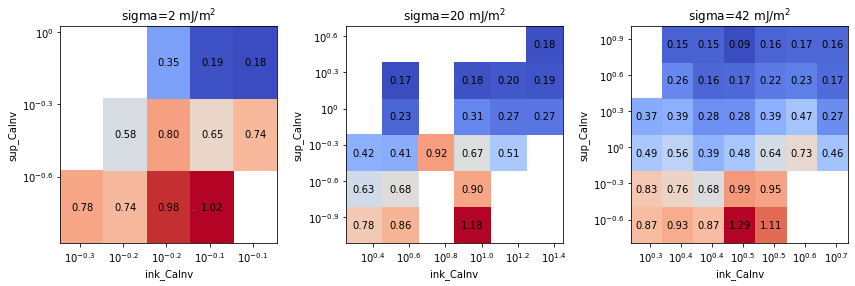

In [546]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['CaProd']=1/ss1['sup_CaInv']*ss1['ink_CaInv']
ss1['CaRatio']=ss1['sup_CaInv']/ss1['ink_CaInv']
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate([2, 20, 42]):
    ss2 = ss1[ss1.sigma==s]
    mp.colorMeshSS(ss2, 'ink_CaInv', 'sup_CaInv', 'vert_hN', logx=True, logy=True, ax=axs[i], fig=fig, legend=False)
    axs[i].set_title(f'sigma={s} mJ/m$^2$')
fig.tight_layout()